In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
import optuna

In [145]:
df = pd.read_csv("C:\\Users\Katy\Documents\Mirea\\7 сем\КР\PyCharm\Sber_first_dataset.csv")
df = df[df['max_floor'] != 0]
selected_columns = [
    'full_sq', 'life_sq', 'floor', 'max_floor',
    'build_year', 'num_room', 'raion_popul',
    'green_zone_part', 'metro_min_avto', 'metro_km_avto', 'kremlin_km']
df_selected = df[selected_columns].dropna()

In [146]:
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    df_clean = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

df_cleaned = remove_outliers(df, selected_columns)

In [147]:
df_cleaned[['build_year', 'floor', 'max_floor']] = df_cleaned[['build_year', 'floor', 'max_floor']].astype('int64')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [148]:
X = df_cleaned[['full_sq', 'life_sq', 'floor', 'max_floor',
    'build_year', 'num_room', 'raion_popul',
    'green_zone_part', 'metro_min_avto', 'metro_km_avto', 'kremlin_km']]
y = df_cleaned.price_doc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [149]:
df_cleaned.price_doc.mean()

8007902.933418968

In [150]:
from catboost import Pool

train_pool = Pool(X_train, label= y_train, cat_features= ['build_year', 'floor', 'max_floor'])
test_pool = Pool(X_test, label= y_test, cat_features= ['build_year', 'floor', 'max_floor'])

In [95]:
# df_cleaned.price_doc.quantile(0.7)

In [96]:
# from sklearn.metrics import mean_absolute_error
# from optuna.integration import CatBoostPruningCallback
# 
# 
# def objective(trial):
#         
#     params = {
# #         "early_stopping_rounds": 20,
#         "loss_function": "MAE",
#         "iterations": trial.suggest_int('iterations', 500, 2000),
#         'random_state': 555,
#         'depth': trial.suggest_int('depth', 6, 16),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.7, 100, log=True),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, log=True),
#         'random_strength': trial.suggest_float('random_strength', 0.2, 0.8),
#         'border_count': 254,
#         # 'min_child_samples': trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32]),
#         "subsample": trial.suggest_float("subsample", 0.7, 1.0),
#         'grow_policy': trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]),
#         'use_best_model': True,
#         'leaf_estimation_method': "Gradient",
#         # 'od_type': 'Iter',
#         # 'od_wait': 50,
#         'logging_level': 'Silent',
#         # "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.7, 1, log=True),
#         "bootstrap_type": "Bernoulli",
#         
#     }
# 
# 
#     new_catboost_reg = CatBoostRegressor(**params)
#     
#     # pruning_callback = CatBoostPruningCallback(trial, "MAE")
#     
#     new_catboost_reg.fit(
#         train_pool,
#         eval_set=train_pool,
#         verbose=0,
#         early_stopping_rounds=150,
#         # callbacks=[pruning_callback]
#     )
# 
#     # pruning_callback.check_pruned()
# 
#     y_pred = new_catboost_reg.predict(X_test)
# 
#     loss = mean_absolute_error(y_test, y_pred)
# 
#     return loss

In [97]:
# import torch
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [98]:
# from optuna import create_study
# from optuna.samplers import TPESampler
# 
# study = create_study(
#     direction='minimize',
#     # pruner=optuna.pruners.MedianPruner(n_warmup_steps=5),
#     # sampler=TPESampler()
# )
# 
# study.optimize(objective, n_trials=200, n_jobs=10, show_progress_bar=True)

In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 300, 500],
    'depth': [4, 6, 8]
}

catboost = CatBoostRegressor(task_type="GPU")
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

0:	learn: 4108526.5938829	total: 1.71ms	remaining: 169ms
1:	learn: 3959074.5112610	total: 2.98ms	remaining: 146ms
2:	learn: 3832344.1200053	total: 4.62ms	remaining: 149ms
3:	learn: 3715894.5421799	total: 5.89ms	remaining: 141ms
4:	learn: 3628655.8579259	total: 7.09ms	remaining: 135ms
5:	learn: 3545498.4757008	total: 8.37ms	remaining: 131ms
6:	learn: 3474805.5172649	total: 9.65ms	remaining: 128ms
7:	learn: 3417936.0580194	total: 11ms	remaining: 126ms
8:	learn: 3359103.6997405	total: 12.6ms	remaining: 127ms
9:	learn: 3317213.8948323	total: 13.8ms	remaining: 124ms
10:	learn: 3272970.8814485	total: 15.2ms	remaining: 123ms
11:	learn: 3237758.3941099	total: 16.4ms	remaining: 121ms
12:	learn: 3205693.6309475	total: 17.7ms	remaining: 118ms
13:	learn: 3178233.3350336	total: 19ms	remaining: 116ms
14:	learn: 3153484.7980132	total: 20.2ms	remaining: 114ms
15:	learn: 3126363.3237432	total: 21.5ms	remaining: 113ms
16:	learn: 3105324.1617350	total: 22.9ms	remaining: 112ms
17:	learn: 3085291.5562933	t

In [110]:
best_params

{'depth': 4, 'learning_rate': 0.1, 'n_estimators': 300}

In [151]:
model = CatBoostRegressor(task_type="GPU", **best_params)
model.fit(X_train, y_train)

# model.fit(
#         train_pool,
#         eval_set=train_pool,
#         verbose=0,
#         early_stopping_rounds=150,
#         # callbacks=[pruning_callback]
#     )
     
y_pred = model.predict(X_test)

0:	learn: 4138328.7426213	total: 1.93ms	remaining: 576ms
1:	learn: 3985647.0736210	total: 4.05ms	remaining: 603ms
2:	learn: 3858057.4038759	total: 5.37ms	remaining: 531ms
3:	learn: 3744551.7740480	total: 6.66ms	remaining: 493ms
4:	learn: 3653063.4612816	total: 7.96ms	remaining: 470ms
5:	learn: 3569019.0494750	total: 9.35ms	remaining: 458ms
6:	learn: 3496553.1915582	total: 10.8ms	remaining: 454ms
7:	learn: 3437238.8937598	total: 12.6ms	remaining: 459ms
8:	learn: 3384273.7160525	total: 14.4ms	remaining: 465ms
9:	learn: 3339118.4627212	total: 16.2ms	remaining: 471ms
10:	learn: 3298499.2262455	total: 32.5ms	remaining: 853ms
11:	learn: 3263947.2089486	total: 34.7ms	remaining: 832ms
12:	learn: 3229421.7232229	total: 36.8ms	remaining: 812ms
13:	learn: 3207516.8278579	total: 38.7ms	remaining: 790ms
14:	learn: 3178447.8954394	total: 40.7ms	remaining: 774ms
15:	learn: 3153394.2730442	total: 43ms	remaining: 763ms
16:	learn: 3136921.9555564	total: 44.8ms	remaining: 745ms
17:	learn: 3117603.2558959

In [152]:
model.save_model('CatBoostModel.cbm')

In [153]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mse

8003540844004.323

In [154]:
mae = mean_absolute_error(y_test, y_pred)
mae

1801147.2711183263

In [155]:
import shap

In [143]:
explainer = shap.Explainer(model=model, seed=555, feature_names=test_pool.get_feature_names())
shap_values = explainer(X_test, y=test_pool.get_label())
shap.initjs()

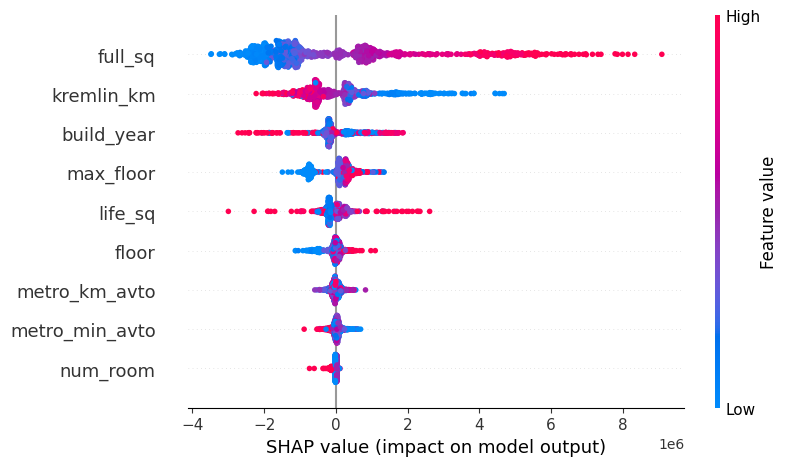

In [144]:
shap.plots.beeswarm(shap_values = shap_values)

In [138]:
shap.plots.force(shap_values[0])